<a href="https://colab.research.google.com/github/truongnc160466/main3/blob/main/K_Means_And_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import OrdinalEncoder
# For standardizing features. We'll use the StandardScaler module
from sklearn.preprocessing import StandardScaler
# Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [235]:
# Raw dataset link
url = 'https://raw.githubusercontent.com/truongnc160466/main1/4b453c52860c1a40065d7974bb177d32b46ff74c/annotation_sheet.csv'
df = pd.read_csv(url)

df.head()

,no,video_index,student_id,student_name,video_id,standardized_dish,dish_occurence,dish_imply,duration,start_time,...,standardized_sauce,sauce,venue,container,recipes,viewer_feeling,food_feeling,youtuber_feeling,location,foreigner
0,1,1,NaN,NaN,5OzrpNCyXqs,snail vermicelli soup,bun oc,NaN,136,01:05,...,NaN,NaN,street,bowl,1,4,2,5,HN,1
1,2,1,NaN,NaN,5OzrpNCyXqs,vermicelli with fried tofu and shrimp paste,bun dau mam tom,NaN,158,03:32,...,"shrimp paste with spices, fish sauce with spices","fish sauce, fermented shrimp paste, pepper, ch...",street,tray,1,4,2,4,HN,1
2,3,1,NaN,NaN,5OzrpNCyXqs,fried spring roll,spring roll,NaN,47,05:23,...,fish sauce with spices,"fish sauce, sweet spicy garlic sauce",street,plate,0,5,2,5,HN,1
3,4,1,NaN,NaN,5OzrpNCyXqs,steamed rolled rice pancake,banh cuon,NaN,181,06:22,...,fish sauce with spices,"garlic water, fried caramelized scallion, pepp...",street,plate,1,5,2,5,HN,1
4,5,1,NaN,NaN,5OzrpNCyXqs,shrimp cake,shrimp cake,NaN,133,09:42,...,fish sauce with spices,"chili, sweet spicy sauce",street,plate,1,4,2,5,HN,1


In [236]:
print('Dataframe info: ')
df.info()
print('\n\n')
print('Dataframe description: ')
df.describe().transpose()

Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   no                              3757 non-null   int64 
 1   video_index                     3757 non-null   int64 
 2   student_id                      2884 non-null   object
 3   student_name                    2884 non-null   object
 4   video_id                        3757 non-null   object
 5   standardized_dish               3757 non-null   object
 6   dish_occurence                  3313 non-null   object
 7   dish_imply                      3159 non-null   object
 8   duration                        3757 non-null   int64 
 9   start_time                      3757 non-null   object
 10  end_time                        3757 non-null   object
 11  standardized_ingredient         3119 non-null   object
 12  no_ingredient                  

,count,mean,std,min,25%,50%,75%,max
no,3757.0,1879.000000,1084.696809,1.0,940.0,1879.0,2818.0,3757.0
video_index,3757.0,515.537131,315.761411,1.0,234.0,527.0,786.0,1068.0
duration,3757.0,110.310088,921.869713,0.0,26.0,60.0,118.0,55958.0
no_ingredient,3757.0,3.284802,2.806564,0.0,1.0,3.0,5.0,20.0
recipes,3757.0,0.274421,0.446281,0.0,0.0,0.0,1.0,1.0
viewer_feeling,3757.0,3.740484,0.925898,1.0,3.0,4.0,4.0,5.0
food_feeling,3757.0,3.412563,1.172153,1.0,2.0,4.0,4.0,5.0
youtuber_feeling,3757.0,4.195369,0.860721,1.0,4.0,4.0,5.0,5.0
foreigner,3757.0,0.933191,0.249724,0.0,1.0,1.0,1.0,1.0


# Data Preprocessing

1 - Ordinal Encoding (Columns = venue, container)

In [237]:
enc = OrdinalEncoder()
df['venue'] = enc.fit_transform(df[['venue']])
df['container'] = enc.fit_transform(df[['container']])

In [238]:
df_drop = df.drop(['no','video_index', 'student_id', 'student_name', 'video_id', 'standardized_dish', 'dish_occurence', 'dish_imply', 
         'start_time', 'end_time', 'standardized_ingredient', 'ingredient', 'standardized_sauce_ingredients', 'standardized_sauce', 'sauce',
         'food_feeling', 'youtuber_feeling', 'location', 'foreigner'], axis = 1)

2 - Data Scaling (Columns = duration, no_ingredient)

In [239]:
scaler = StandardScaler()
df_drop[["duration"]] = scaler.fit_transform(df_drop[["duration"]])
df_drop[["no_ingredient"]] = scaler.fit_transform(df_drop[["no_ingredient"]])

3 - Show all features

In [240]:
df_final = df_drop.drop(['viewer_feeling'], axis = 1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duration       3757 non-null   float64
 1   no_ingredient  3757 non-null   float64
 2   venue          3757 non-null   float64
 3   container      3757 non-null   float64
 4   recipes        3757 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 146.9 KB


4 - Plot the original data

Text(0.5, 1.0, 'Visualization of raw data')

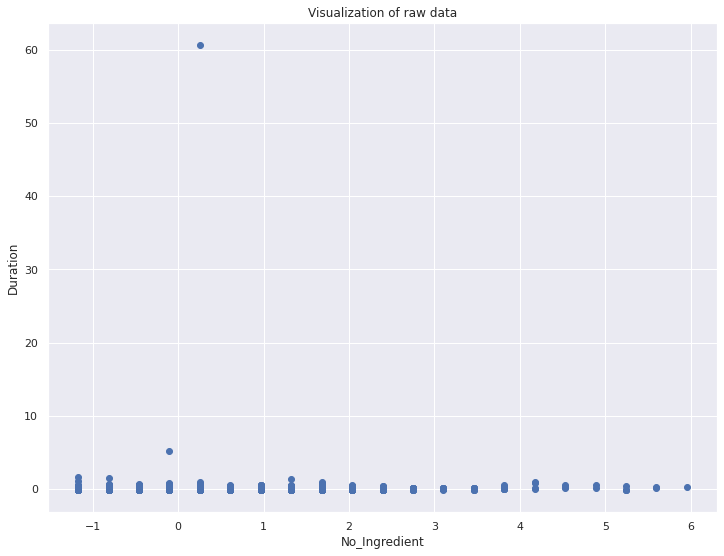

In [241]:
# We'll plot the data. We create a 12 by 9 inches figure
# We have 3757 data points, which we'll scatter across No_Ingredient and Duration, located on positions 1 and 0 respectively in our data set
plt.figure(figsize = (12, 9))
plt.scatter(df_final.iloc[:, 1], df_final.iloc[:, 0])
plt.xlabel('No_Ingredient')
plt.ylabel('Duration')
plt.title('Visualization of raw data')

# PCA

In [242]:
df_final.head()

,duration,no_ingredient,venue,container,recipes
0,0.027871,2.036640,3.0,2.0,1
1,0.051739,2.749350,3.0,9.0,1
2,-0.068685,0.254865,3.0,7.0,0
3,0.076691,0.611220,3.0,7.0,1
4,0.024616,0.254865,3.0,7.0,1


In [243]:
pca = PCA()
pca.fit(df_final)

PCA()

In [244]:
# The attribute shows how much variance is explained by each of five individual components
pca.explained_variance_ratio_

array([0.55610995, 0.20702388, 0.11376623, 0.10438739, 0.01871254])

Text(0, 0.5, 'Cumulative Explained Variance')

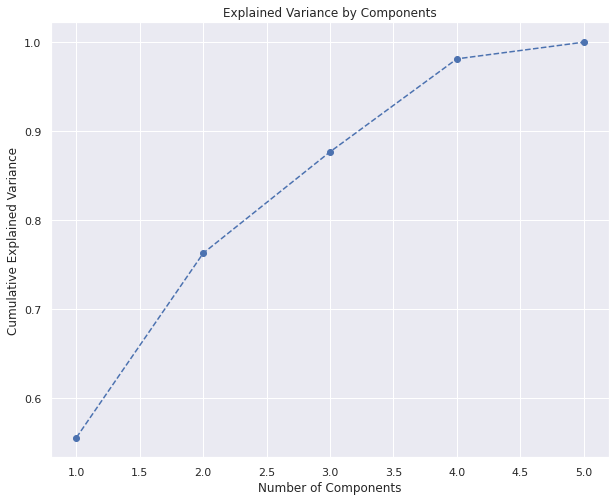

In [245]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [246]:
# We choose three components.
pca = PCA(n_components = 3)
# Fit the model of our data with the selected number of components. In our case it's three
pca.fit(df_final)

PCA(n_components=3)

In [247]:
pca.transform(df_final)

array([[-2.99769000e+00,  1.48773170e+00,  1.59104017e+00],
       [ 3.95785056e+00,  1.77403507e+00,  2.32152214e+00],
       [ 2.07371814e+00,  1.69210568e+00,  1.34203181e-01],
       ...,
       [ 2.17497092e+00, -2.99049608e-01, -3.64182466e-03],
       [ 3.15989464e+00, -2.53593100e-01,  3.87375027e-01],
       [ 2.08162979e+00,  1.70874262e+00,  4.32605704e-01]])

In [248]:
scores_pca = pca.transform(df_final)

# K-means clustering with PCA

In [249]:
# We fit K means using the transformed data from the PCA
wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

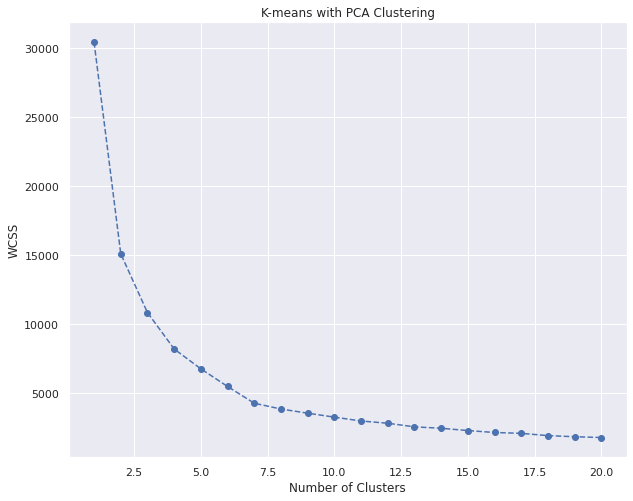

In [250]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [251]:
# We have chosen five clusters, so we run K-means with number of clusters equals five
# Some initializer and random state as before
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [252]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters
df_pca_kmeans = pd.concat([df_final.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels
df_pca_kmeans['Cluster K-means PCA'] = kmeans_pca.labels_
df_pca_kmeans.head()

,duration,no_ingredient,venue,container,recipes,Component 1,Component 2,Component 3,Cluster K-means PCA
0,0.027871,2.036640,3.0,2.0,1,-2.997690,1.487732,1.591040,1
1,0.051739,2.749350,3.0,9.0,1,3.957851,1.774035,2.321522,2
2,-0.068685,0.254865,3.0,7.0,0,2.073718,1.692106,0.134203,2
3,0.076691,0.611220,3.0,7.0,1,2.055470,1.696737,0.635996,2
4,0.024616,0.254865,3.0,7.0,1,2.070164,1.695570,0.328145,2


In [253]:
df_pca_kmeans['Cluster'] = df_pca_kmeans['Cluster K-means PCA'] + 1

1 - 2D Display

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


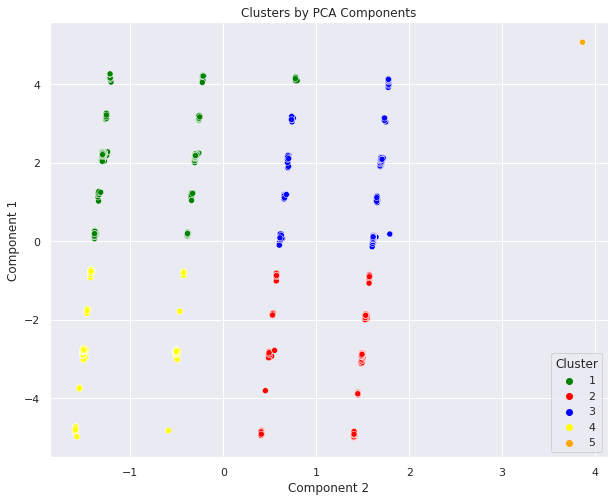

In [254]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second
x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Cluster'], palette = ['green', 'red', 'blue', 'yellow', 'orange'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


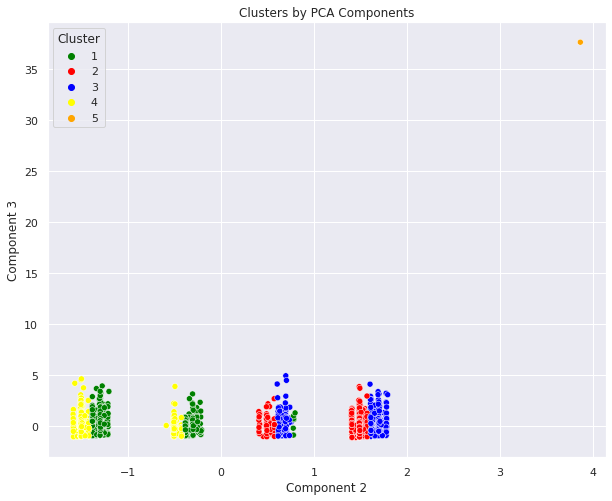

In [255]:
# Plot data by PCA components. The Y axis is the third component, X axis is the second
x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Cluster'], palette = ['green', 'red', 'blue', 'yellow', 'orange'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


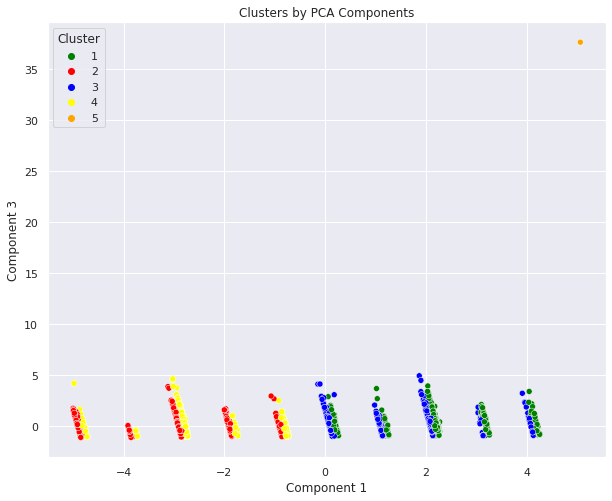

In [256]:
# Plot data by PCA components. The Y axis is the first component, X axis is the third
x_axis = df_pca_kmeans['Component 1']
y_axis = df_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Cluster'], palette = ['green', 'red', 'blue', 'yellow', 'orange'])
plt.title('Clusters by PCA Components')
plt.show()

2 - 3D Display

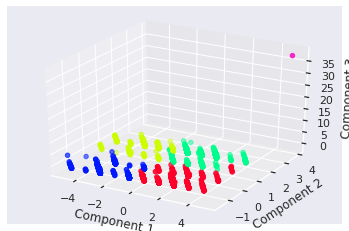

In [257]:
x = df_pca_kmeans['Component 1']
y = df_pca_kmeans['Component 2']
z = df_pca_kmeans['Component 3']

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.scatter(x, y, z, marker = 'o', c = df_pca_kmeans['Cluster'], cmap = 'gist_rainbow')
plt.show()

# K-means clustering without PCA

In [258]:
# We fit K means using the original data
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)

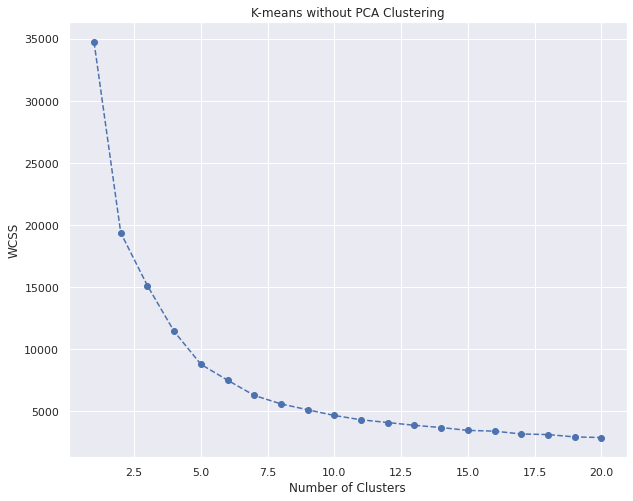

In [259]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means without PCA Clustering')
plt.show()

In [260]:
# We have chosen five clusters, so we run K-means with number of clusters equals five
# Some initializer and random state as before
kmeans_1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
# We fit our data with the k-means model
kmeans_1.fit(df_final)

KMeans(n_clusters=5, random_state=42)

In [261]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters
df_final2 = df_final.rename(columns = {'duration': 'Duration', 'no_ingredient': 'No_Ingredient', 
                                       'venue': 'Venue', 'container': 'Container', 'recipes': 'Recipes'}).copy()
# The last column we add contains the pca k-means clustering labels
df_final2['Cluster K-means'] = kmeans_1.labels_
df_final2.head()

,Duration,No_Ingredient,Venue,Container,Recipes,Cluster K-means
0,0.027871,2.036640,3.0,2.0,1,2
1,0.051739,2.749350,3.0,9.0,1,4
2,-0.068685,0.254865,3.0,7.0,0,4
3,0.076691,0.611220,3.0,7.0,1,4
4,0.024616,0.254865,3.0,7.0,1,4


In [262]:
df_final2['Cluster'] = df_final2['Cluster K-means'] + 1

In [263]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         3757 non-null   float64
 1   No_Ingredient    3757 non-null   float64
 2   Venue            3757 non-null   float64
 3   Container        3757 non-null   float64
 4   Recipes          3757 non-null   int64  
 5   Cluster K-means  3757 non-null   int32  
 6   Cluster          3757 non-null   int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 176.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


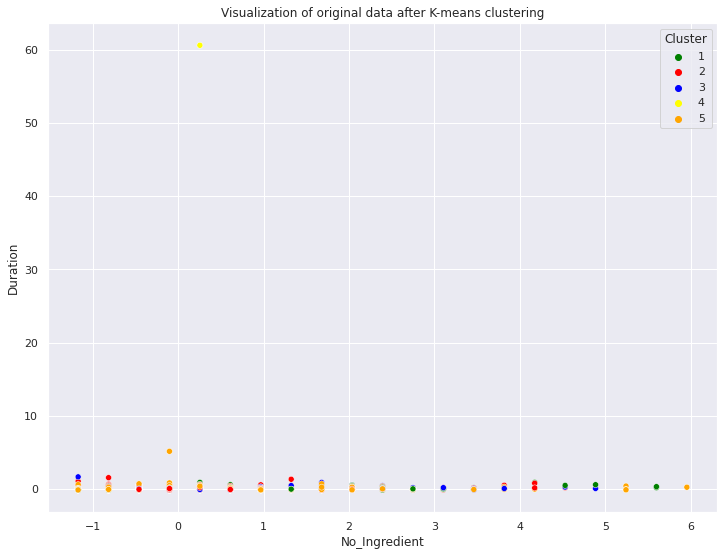

In [264]:
# Plot the original data after K-means clustering
x_axis = df_final2['No_Ingredient']
y_axis = df_final2['Duration']
plt.figure(figsize = (12, 9))
sns.scatterplot(x_axis, y_axis, hue = df_final2['Cluster'], palette = ['green', 'red', 'blue', 'yellow', 'orange'])
plt.title('Visualization of original data after K-means clustering')
plt.show()